In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as obj:
    obj.extractall()

In [3]:
df = pd.read_csv('loan/loan.csv')
df.head()

/tmp/ipykernel_24563/2035651734.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(['id', 'member_id'], axis=1)

In [5]:
df.shape

(887379, 72)

### Goal
Predict loan status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  float64
 1   funded_amnt                  887379 non-null  float64
 2   funded_amnt_inv              887379 non-null  float64
 3   term                         887379 non-null  object 
 4   int_rate                     887379 non-null  float64
 5   installment                  887379 non-null  float64
 6   grade                        887379 non-null  object 
 7   sub_grade                    887379 non-null  object 
 8   emp_title                    835917 non-null  object 
 9   emp_length                   842554 non-null  object 
 10  home_ownership               887379 non-null  object 
 11  annual_inc                   887375 non-null  float64
 12  verification_status          887379 non-null  object 
 13 

#### Dropping 
-  open_acc_6m                  21372 non-null   float64
-  open_il_6m                   21372 non-null   float64
-  open_il_12m                  21372 non-null   float64
-  open_il_24m                  21372 non-null   float64
-  mths_since_rcnt_il           20810 non-null   float64
-  total_bal_il                 21372 non-null   float64
-  il_util                      18617 non-null   float64
-  open_rv_12m                  21372 non-null   float64
-  open_rv_24m                  21372 non-null   float64
-  max_bal_bc                   21372 non-null   float64
-  all_util                     21372 non-null   float64
-  total_rev_hi_lim             817103 non-null  float64
-  inq_fi                       21372 non-null   float64
-  total_cu_tl                  21372 non-null   float64
-  inq_last_12m                 21372 non-null   float64
-  annual_inc_joint             511 non-null     float64
-  dti_joint                    509 non-null     float64
-  verification_status_joint    511 non-null     object 

In [7]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_

### Percent of missing data

In [8]:
miss = df.isnull().sum()*100/len(df)

In [9]:
miss.sort_values(ascending=False).head(21)

dti_joint                      99.942640
verification_status_joint      99.942415
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
total_bal_il                   97.591559
inq_last_12m                   97.591559
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
total_cu_tl                    97.591559
desc                           85.797951
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
dtype: float64

<Axes: xlabel='count', ylabel='loan_status'>

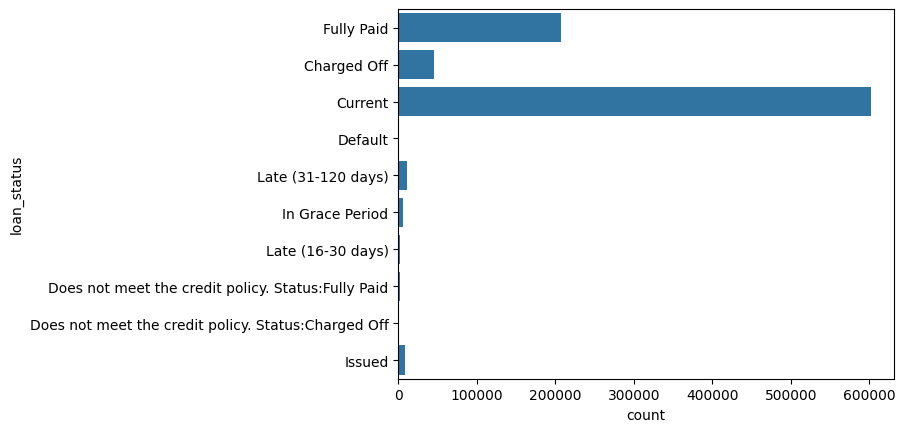

In [10]:
sns.countplot(df['loan_status'])

In [11]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [12]:
def risky(loan_status):
    risk_group = [ 'Charged Off', 'Default','Late (31-120 days)', 
             'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off']
    
    not_risk_group = ['Does not meet the credit policy. Status:Fully Paid', 'Current', 'Fully Paid' ]
    if loan_status in risk_group:
        return 1
    elif loan_status in not_risk_group:
        return 0

df.loan_status = df.loan_status.apply(risky)

In [13]:
df.loan_status.value_counts()

loan_status
0.0    811490
1.0     67429
Name: count, dtype: int64

In [14]:
missing_lot = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'total_bal_il', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'inq_last_12m', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'loan_status']
df_new = df[missing_lot].copy()

In [15]:
# sns.pairplot(df_new, hue='loan_status')

In [16]:
df.mths_since_last_major_derog

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
887374     NaN
887375    29.0
887376     NaN
887377    22.0
887378     NaN
Name: mths_since_last_major_derog, Length: 887379, dtype: float64

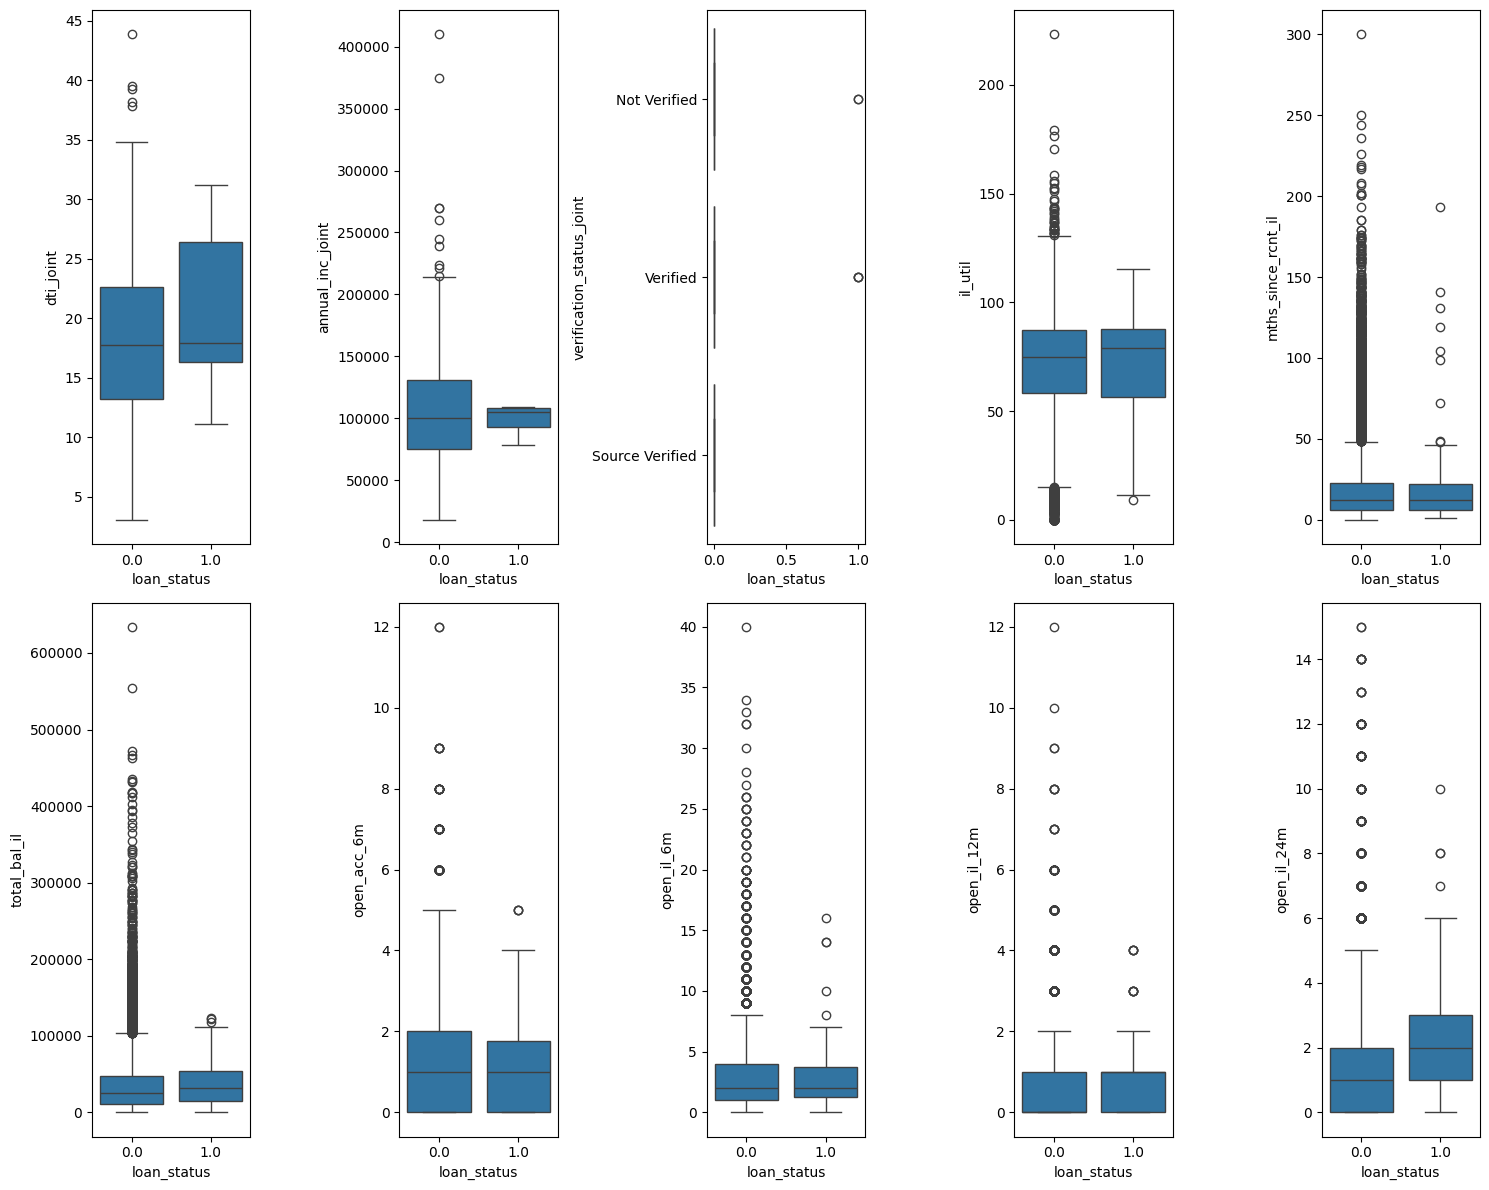

In [17]:
# nums = [i for i in range(21)]
# missing_lot_no = list(zip(missing_lot[:-1], nums))
nums = [i for i in range(10)]
missing_lot_no = list(zip(missing_lot[:-1], nums))

fig, axes = plt.subplots(2, 5, figsize=(15,12))
axes = axes.ravel()
for att, i in missing_lot_no:
        # print(att)
        ax = axes[i]
        sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
plt.tight_layout()
plt.show()

In [18]:
nums = [i for i in range(11)]
missing_lot_no = list(zip(missing_lot[10:-1], nums))
print(missing_lot_no)

[('inq_last_12m', 0), ('open_rv_12m', 1), ('open_rv_24m', 2), ('max_bal_bc', 3), ('all_util', 4), ('inq_fi', 5), ('total_cu_tl', 6), ('desc', 7), ('mths_since_last_record', 8), ('mths_since_last_major_derog', 9), ('mths_since_last_delinq', 10)]


In [19]:
# nums = [i for i in range(10)]
# missing_lot_no = list(zip(missing_lot[11:-1], nums))

# fig, axes = plt.subplots(2, 5, figsize=(15,12))
# axes = axes.ravel()
# for att, i in missing_lot_no:
#         # print(att)
#         ax = axes[i]
#         sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
# plt.tight_layout()
# plt.show()

In [20]:
missing_lot.pop()

'loan_status'

In [21]:
df2 = df.drop(missing_lot, axis = 1).copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   funded_amnt                 887379 non-null  float64
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  object 
 4   int_rate                    887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_title                   835917 non-null  object 
 9   emp_length                  842554 non-null  object 
 10  home_ownership              887379 non-null  object 
 11  annual_inc                  887375 non-null  float64
 12  verification_status         887379 non-null  object 
 13  issue_d       

In [23]:
df2.isnull().sum()*100/len(df2)

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.799326
emp_length                     5.051393
home_ownership                 0.000000
annual_inc                     0.000451
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.953369
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.017242
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003268
earliest_cr_line               0.003268
inq_last_6mths                 0.003268


In [24]:
def numeric_categorical(df):
    numeric_cols = df.select_dtypes(include='number').columns
    categorical_cols = df.select_dtypes(exclude='number').columns
    return numeric_cols, categorical_cols



In [25]:
numerical, categorical = numeric_categorical(df2)
numerical

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [26]:
df2[numerical]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,0.0,27.65,0.0,1.0,...,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.0,1.00,0.0,5.0,...,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,0.0,8.72,0.0,2.0,...,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,0.0,20.00,0.0,1.0,...,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,0.0,17.94,0.0,0.0,...,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,11.99,332.10,31000.0,0.0,28.69,0.0,0.0,...,0.00,0.00,0.00,332.10,0.0,1.0,0.0,0.0,25274.0,17100.0
887375,24000.0,24000.0,24000.0,11.99,797.03,79000.0,0.0,3.90,0.0,1.0,...,0.00,0.00,0.00,797.03,0.0,1.0,0.0,0.0,140285.0,10200.0
887376,13000.0,13000.0,13000.0,15.99,316.07,35000.0,0.0,30.90,0.0,0.0,...,0.00,0.00,0.00,316.07,0.0,1.0,0.0,0.0,34178.0,18000.0
887377,12000.0,12000.0,12000.0,19.99,317.86,64400.0,0.0,27.19,1.0,2.0,...,0.00,0.00,0.00,317.86,1.0,1.0,0.0,0.0,58418.0,27000.0


In [27]:
df2.delinq_2yrs.value_counts()

# def grouping()

delinq_2yrs
0.0     716961
1.0     113224
2.0      33551
3.0      11977
4.0       5327
5.0       2711
6.0       1471
7.0        784
8.0        461
9.0        284
10.0       192
11.0       121
12.0        89
13.0        64
14.0        45
15.0        28
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
21.0         2
26.0         2
20.0         2
29.0         1
24.0         1
30.0         1
27.0         1
39.0         1
Name: count, dtype: int64

In [28]:
corr = df2[numerical].corr()

In [29]:
df2[numerical].corr().loan_amnt.sort_values()

pub_rec                      -0.081177
inq_last_6mths               -0.034168
collections_12_mths_ex_med   -0.016650
tot_coll_amt                 -0.004275
delinq_2yrs                  -0.000159
loan_status                   0.003711
acc_now_delinq                0.003947
dti                           0.020675
total_rec_late_fee            0.031395
collection_recovery_fee       0.052205
recoveries                    0.073150
revol_util                    0.119565
int_rate                      0.145023
open_acc                      0.198906
total_acc                     0.222639
last_pymnt_amnt               0.229244
total_rev_hi_lim              0.312439
tot_cur_bal                   0.328782
annual_inc                    0.332698
revol_bal                     0.333580
total_rec_prncp               0.390473
total_pymnt                   0.474626
total_pymnt_inv               0.475655
total_rec_int                 0.533916
out_prncp                     0.646897
out_prncp_inv            

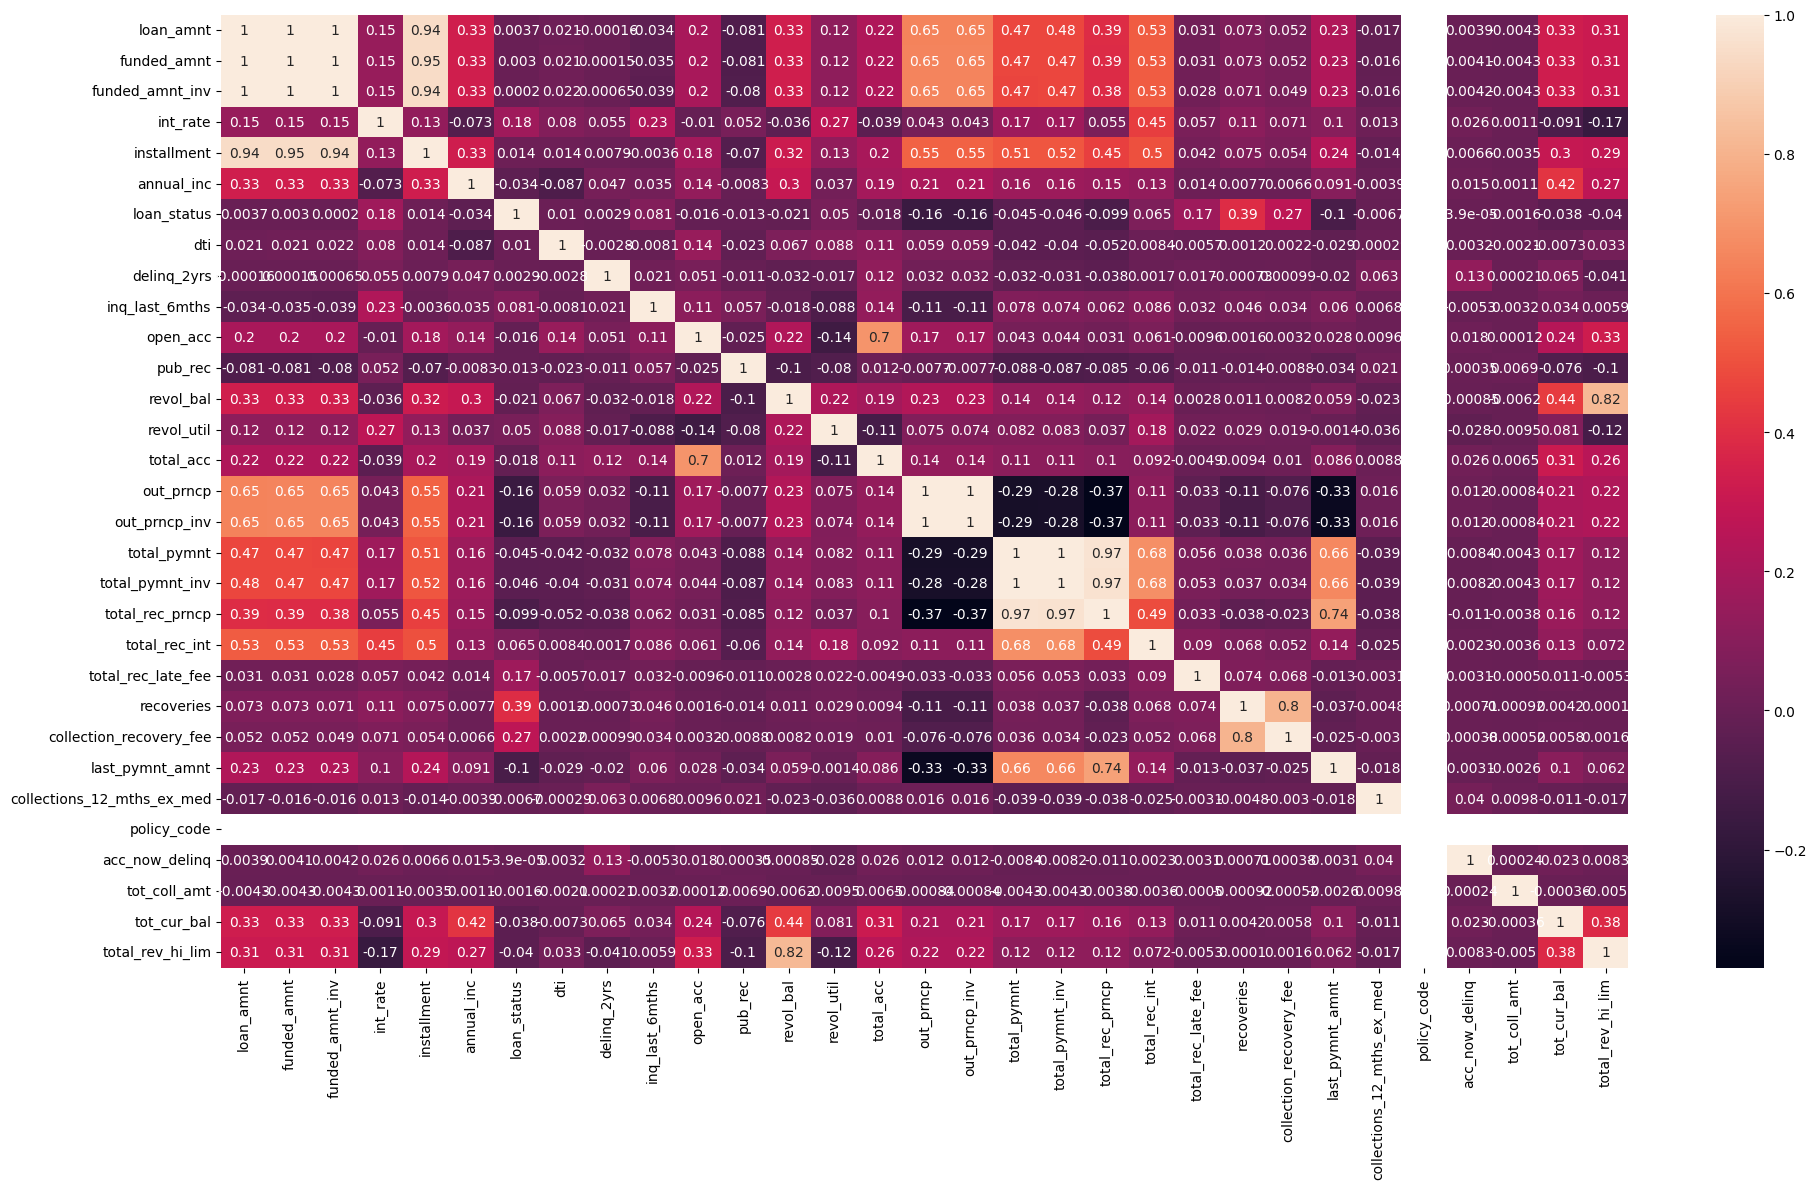

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.tight_layout()

In [31]:
df2.out_prncp_inv

0             0.00
1             0.00
2             0.00
3             0.00
4           766.90
            ...   
887374     7055.47
887375    16933.26
887376    11155.50
887377    10447.31
887378    14110.94
Name: out_prncp_inv, Length: 887379, dtype: float64

In [32]:
#DROPPING Fundedamnt, funded amnt inv, out_prncp_inv, total payment, total payment inv, recoveries, revol_bal,  
df2 = df2.drop(['funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',  'recoveries', 'revol_bal'], axis=1)

In [33]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [34]:
df2.inq_last_6mths.unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [35]:
df2 = df2.drop('issue_d', axis=1)

In [36]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [37]:
### inq_last_6mths
def ordinal(inq_last_6mths):
    if inq_last_6mths==0:
        return '0'
    elif inq_last_6mths > 0 and inq_last_6mths <= 5:
        return '1-5'
    elif inq_last_6mths > 5 and inq_last_6mths <= 10:
        return '6-10'    
    elif inq_last_6mths > 10 and inq_last_6mths <= 15:
        return '11-15'
    elif inq_last_6mths > 15 and inq_last_6mths <= 20:
        return '16-20'
    elif inq_last_6mths > 20 and inq_last_6mths <= 25:
        return '21-25'
    elif inq_last_6mths > 25 and inq_last_6mths <= 30:
        return '26-30'
    else:
        return np.nan

df2['inq_last_6mths'] = df2['inq_last_6mths'].apply(ordinal)

In [38]:
df2['inq_last_6mths'].value_counts()

inq_last_6mths
0        497905
1-5      387752
6-10       1622
11-15        51
16-20        12
21-25         3
26-30         2
Name: count, dtype: int64

In [39]:
#dropping policycode, emptitle, pymnt plan, url, zip_code, addr_state, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, application_type
df2 = df2.drop(['policy_code', 'emp_title', 'pymnt_plan', 'url', 'zip_code', 'addr_state', 'earliest_cr_line', 
                'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], axis=1)

In [40]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'inq_last_6mths',
       'initial_list_status'],
      dtype='object')


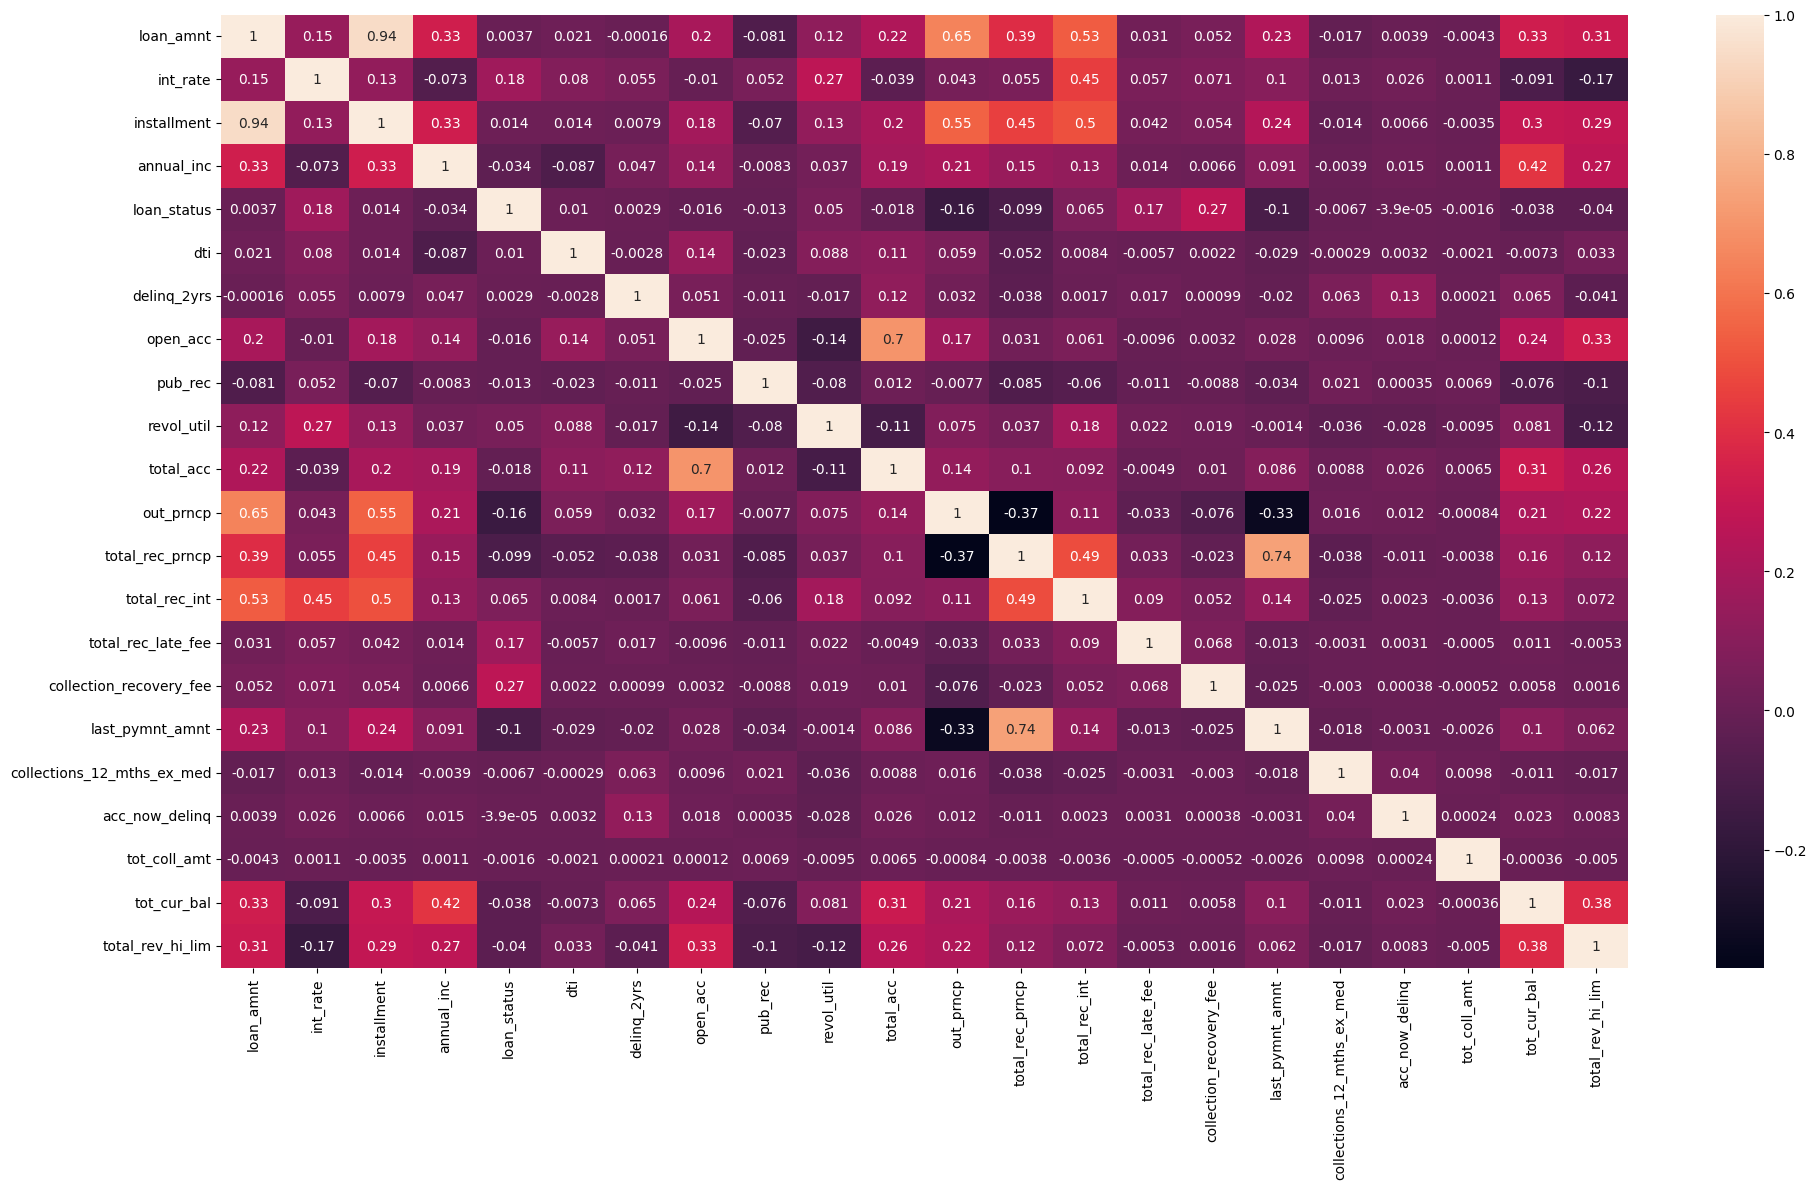

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(df2[numeric_cols].corr(), annot=True)
plt.tight_layout()

In [42]:
df2[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.00,20000.000,35000.00
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.99,16.200,28.99
installment,887379.0,436.717127,244.186593,15.67,260.705,382.55,572.600,1445.46
annual_inc,887375.0,75027.587761,64698.300142,0.00,45000.000,65000.00,90000.000,9500000.00
loan_status,878919.0,0.076718,0.266144,0.00,0.000,0.00,0.000,1.00
dti,887379.0,18.157039,17.190626,0.00,11.910,17.65,23.950,9999.00
delinq_2yrs,887350.0,0.314442,0.862244,0.00,0.000,0.00,0.000,39.00
open_acc,887350.0,11.548469,5.317313,0.00,8.000,11.00,14.000,90.00
pub_rec,887350.0,0.195307,0.582091,0.00,0.000,0.00,0.000,86.00
revol_util,886877.0,55.067693,23.834344,0.00,37.700,56.00,73.600,892.30


In [43]:
len(df2.columns)

32

In [44]:
# sns.jointplot(x ='loan_amnt', y ='installment', data = df2, hue='loan_status')


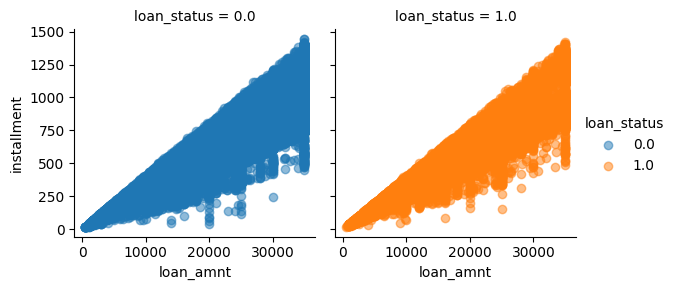

In [45]:
g = sns.FacetGrid(df2, col="loan_status", hue="loan_status")
g.map(plt.scatter, "loan_amnt", "installment", alpha=0.5)
g.add_legend()
plt.show()


In [46]:
# sns.jointplot(x ='total_acc', y ='open_acc', data = df2, hue='loan_status')


In [47]:
# sns.jointplot(x ='total_rec_prncp', y ='last_pymnt_amnt', data = df2, hue='loan_status', alpha=.2)



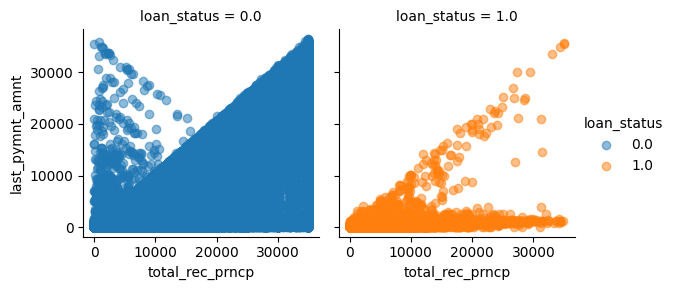

In [48]:
g = sns.FacetGrid(df2, col="loan_status", hue="loan_status")
g.map(plt.scatter, "total_rec_prncp", "last_pymnt_amnt", alpha=0.5)
g.add_legend()
plt.show()


<Axes: xlabel='pub_rec', ylabel='count'>

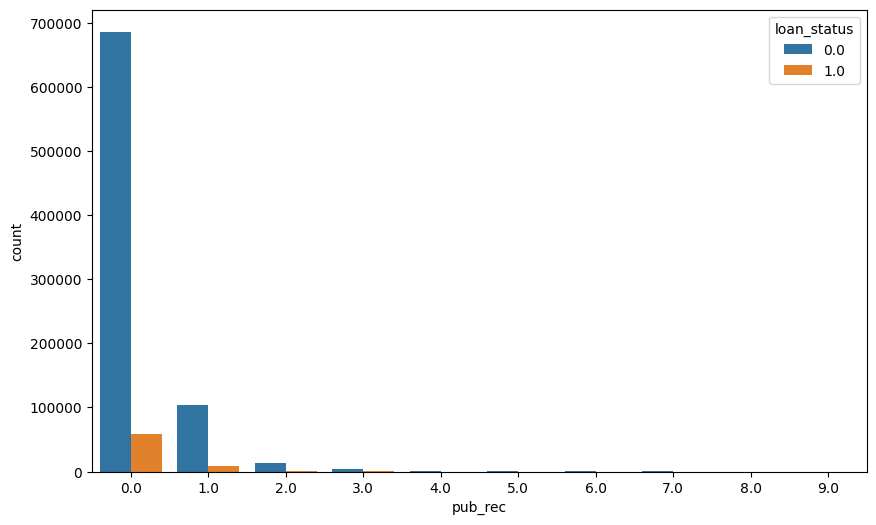

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec', data=df2, hue='loan_status', dodge=True, order=df2['pub_rec'].value_counts().index[:10])


In [50]:
df2.pub_rec.value_counts()

pub_rec
0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
19.0         2
14.0         2
49.0         2
40.0         1
63.0         1
54.0         1
34.0         1
23.0         1
26.0         1
28.0         1
20.0         1
86.0         1
22.0         1
Name: count, dtype: int64

In [51]:
def ordinal2(pub_rec):
    if pub_rec == 0:
        return pub_rec
    elif pub_rec == 1:
        return pub_rec
    elif pub_rec == 2:
        return pub_rec
    elif pub_rec >=3 and pub_rec <= 10:
        return '3-10'
    elif pub_rec > 10:
        return '10+'
    

df2['pub_rec'] = df2['pub_rec'].apply(ordinal2)

In [52]:
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'open_acc', 'revol_util', 'total_acc',
       'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'inq_last_6mths', 'pub_rec',
       'initial_list_status'],
      dtype='object')


In [53]:
df2.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    44825
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                    8460
purpose                           0
title                           153
dti                               0
delinq_2yrs                      29
inq_last_6mths                   32
open_acc                         29
pub_rec                          29
revol_util                      502
total_acc                        29
initial_list_status               0
out_prncp                         0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med  

In [54]:
df2 = df2.dropna(subset=['loan_status', 'title', 'delinq_2yrs', 'inq_last_6mths', 
                    'open_acc', 'pub_rec', 'revol_util', 'total_acc', 
                    'collections_12_mths_ex_med', 'acc_now_delinq'])
df2 = df2.reset_index(drop=True)

In [55]:
df2.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    44175
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
title                             0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med  

In [56]:
from sklearn.impute import SimpleImputer

imputer_numeric = SimpleImputer(strategy='median')
df2.loc[:, numeric_cols] = imputer_numeric.fit_transform(df2.loc[:, numeric_cols])

imputer_categorical = SimpleImputer(strategy='most_frequent')
df2.loc[:, categorical_cols] = imputer_categorical.fit_transform(df2.loc[:, categorical_cols])



In [57]:
df2.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

In [58]:
df2 = df2.drop('title',  axis=1)
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'open_acc', 'revol_util', 'total_acc',
       'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'inq_last_6mths', 'pub_rec',
       'initial_list_status'],
      dtype='object')


In [59]:
df3 = pd.concat([df2[categorical_cols], df2.loan_status], axis=1).copy()


In [60]:
df3[categorical_cols] = df3[categorical_cols].astype('str')

In [61]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le =LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
df3.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,inq_last_6mths,pub_rec,initial_list_status,loan_status
0,0,1,6,1,5,2,1,1,0,0,0.0
1,1,2,13,10,5,1,0,1,0,0,1.0
2,0,2,14,1,5,0,11,1,0,0,0.0
3,0,2,10,1,5,1,9,1,0,0,0.0
4,1,1,9,0,5,1,9,0,0,0,0.0


In [62]:
df3[categorical_cols] = df3[categorical_cols].astype('int')

In [63]:
df3

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,inq_last_6mths,pub_rec,initial_list_status,loan_status
0,0,1,6,1,5,2,1,1,0,0,0.0
1,1,2,13,10,5,1,0,1,0,0,1.0
2,0,2,14,1,5,0,11,1,0,0,0.0
3,0,2,10,1,5,1,9,1,0,0,0.0
4,1,1,9,0,5,1,9,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
878264,0,1,9,8,5,2,2,0,1,0,0.0
878265,0,1,9,1,1,2,4,1,0,0,0.0
878266,1,3,16,5,5,2,2,0,1,1,0.0
878267,1,4,22,0,5,1,2,1,0,1,0.0


In [64]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
X_temp = df3[categorical_cols]
y_temp = df3['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)
chi_scores = chi2(X_train, y_train)


In [65]:
chi_scores

(array([  634.05990501, 13321.3117117 , 55988.53207668,   333.25297974,
         1078.5176301 ,   748.19963181,  2339.2633195 ,  1943.86762265,
          190.9803225 ,  2384.47578754]),
 array([6.54385523e-140, 0.00000000e+000, 0.00000000e+000, 1.88059116e-074,
        1.54168978e-236, 9.88250542e-165, 0.00000000e+000, 0.00000000e+000,
        1.94245355e-043, 0.00000000e+000]))

<Axes: >

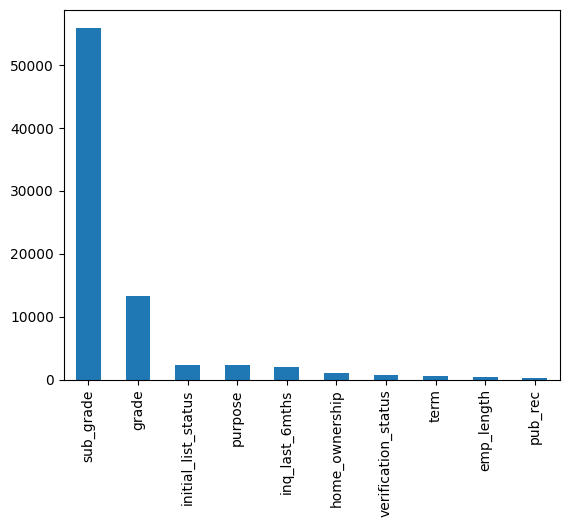

In [66]:
chi_values = pd.Series(chi_scores[0], index=X_temp.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [67]:
chi_values

sub_grade              55988.532077
grade                  13321.311712
initial_list_status     2384.475788
purpose                 2339.263320
inq_last_6mths          1943.867623
home_ownership          1078.517630
verification_status      748.199632
term                     634.059905
emp_length               333.252980
pub_rec                  190.980323
dtype: float64

<Axes: >

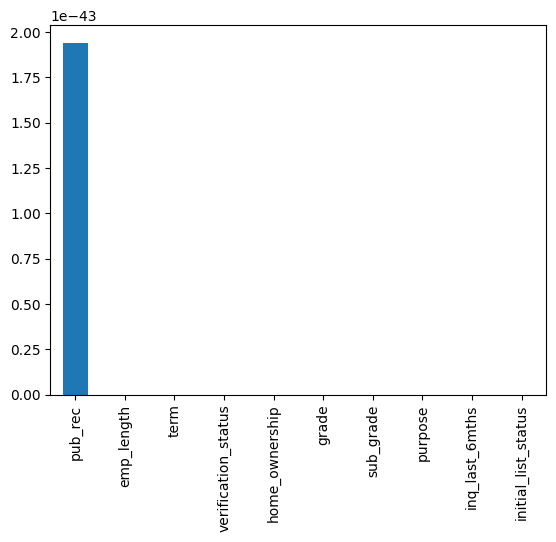

In [68]:
p_values = pd.Series(chi_scores[1], index=X_temp.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [69]:
p_values

pub_rec                 1.942454e-43
emp_length              1.880591e-74
term                   6.543855e-140
verification_status    9.882505e-165
home_ownership         1.541690e-236
grade                   0.000000e+00
sub_grade               0.000000e+00
purpose                 0.000000e+00
inq_last_6mths          0.000000e+00
initial_list_status     0.000000e+00
dtype: float64

In [70]:
df2.pub_rec.value_counts()

pub_rec
0.0     744126
1.0     111941
2.0      14653
3-10      7460
10+         89
Name: count, dtype: int64

<Axes: xlabel='emp_length', ylabel='count'>

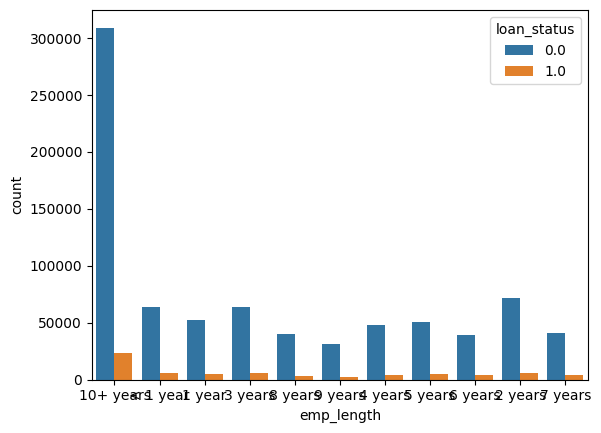

In [71]:
sns.countplot(x='emp_length', hue='loan_status', data=df2)

<Axes: xlabel='pub_rec', ylabel='count'>

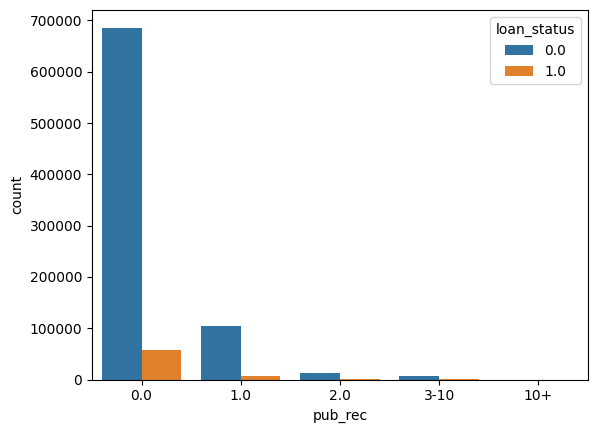

In [72]:
sns.countplot(x='pub_rec', hue='loan_status', data=df2)

In [73]:
#### DROPPING EMP LENGTH 
# df2 = df2.drop('emp_length', axis=1)
numeric_cols, categorical_cols = numeric_categorical(df2)
print(numeric_cols, '\n', categorical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'open_acc', 'revol_util', 'total_acc',
       'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'inq_last_6mths', 'pub_rec',
       'initial_list_status'],
      dtype='object')


In [74]:
df.emp_length.value_counts()

emp_length
10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: count, dtype: int64

In [75]:
df2[categorical_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,inq_last_6mths,pub_rec,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,credit_card,1-5,0.0,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,car,1-5,0.0,f
2,36 months,C,C5,10+ years,RENT,Not Verified,small_business,1-5,0.0,f
3,36 months,C,C1,10+ years,RENT,Source Verified,other,1-5,0.0,f
4,60 months,B,B5,1 year,RENT,Source Verified,other,0,0.0,f
...,...,...,...,...,...,...,...,...,...,...
878264,36 months,B,B5,8 years,RENT,Verified,debt_consolidation,0,1.0,f
878265,36 months,B,B5,10+ years,MORTGAGE,Verified,home_improvement,1-5,0.0,f
878266,60 months,D,D2,5 years,RENT,Verified,debt_consolidation,0,1.0,w
878267,60 months,E,E3,1 year,RENT,Source Verified,debt_consolidation,1-5,0.0,w


In [76]:
from sklearn.preprocessing import OneHotEncoder
df2[categorical_cols] = df2[categorical_cols].astype('str')
oh = OneHotEncoder(drop='first')
enc = oh.fit_transform(df2[categorical_cols])
column_names = oh.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(enc.toarray(), columns=column_names)
df2 = pd.concat([df2, encoded_df], axis=1)
df2 = df2.drop(categorical_cols, axis=1)

In [77]:
df2

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_util,total_acc,...,inq_last_6mths_11-15,inq_last_6mths_16-20,inq_last_6mths_21-25,inq_last_6mths_26-30,inq_last_6mths_6-10,pub_rec_1.0,pub_rec_10+,pub_rec_2.0,pub_rec_3-10,initial_list_status_w
0,5000.0,10.65,162.87,24000.0,0.0,27.65,0.0,3.0,83.7,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,15.27,59.83,30000.0,1.0,1.00,0.0,3.0,9.4,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2400.0,15.96,84.33,12252.0,0.0,8.72,0.0,2.0,98.5,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000.0,13.49,339.31,49200.0,0.0,20.00,0.0,10.0,21.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,12.69,67.79,80000.0,0.0,17.94,0.0,15.0,53.9,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878264,10000.0,11.99,332.10,31000.0,0.0,28.69,0.0,9.0,82.1,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
878265,24000.0,11.99,797.03,79000.0,0.0,3.90,0.0,5.0,84.5,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
878266,13000.0,15.99,316.07,35000.0,0.0,30.90,0.0,9.0,61.3,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
878267,12000.0,19.99,317.86,64400.0,0.0,27.19,1.0,17.0,30.6,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
numeric_cols_list = list(numeric_cols)
numeric_cols_list.remove('loan_status')

In [79]:
numeric_cols = numeric_cols_list

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(df2[numeric_cols])
df2[numeric_cols] = pd.DataFrame(scaled_data, columns=numeric_cols)

In [81]:
X = df2.drop('loan_status', axis=1)
y = df2.loan_status
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [82]:
X_train.shape

(614788, 102)

In [83]:
X_val.shape

(131740, 102)

In [84]:
X_test.shape

(131741, 102)

In [85]:
y_train

330236    1.0
667192    0.0
465550    0.0
491095    0.0
670619    0.0
         ... 
259178    0.0
365838    0.0
131932    0.0
671155    0.0
121958    1.0
Name: loan_status, Length: 614788, dtype: float64

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


/home/jinnn/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred = lr.predict(X_val)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    121692
         1.0       0.98      0.65      0.78     10048

    accuracy                           0.97    131740
   macro avg       0.97      0.83      0.88    131740
weighted avg       0.97      0.97      0.97    131740

